In [13]:
import os
os.getcwd()

'E:\\01. Academics\\05. GUVI\\Mini_Project\\03. Credit Risk Analysis'

In [15]:
!pip install -r requirements.txt

  Using cached mlflow-3.9.0-py3-none-any.whl.metadata (31 kB)
  Using cached ydata_profiling-4.18.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached mlflow_skinny-3.9.0-py3-none-any.whl.metadata (32 kB)
  Using cached mlflow_tracing-3.9.0-py3-none-any.whl.metadata (19 kB)
  Using cached flask_cors-6.0.2-py3-none-any.whl.metadata (5.3 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached alembic-1.18.4-py3-none-any.whl.metadata (7.2 kB)
  Using cached cryptography-46.0.5-cp311-abi3-win_amd64.whl.metadata (5.7 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached huey-2.6.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached skops-0.13.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.42.2 requires protobuf<6,>=3.20, but you have protobuf 6.33.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\Lenova\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


  Using cached graphql_core-3.2.7-py3-none-any.whl.metadata (11 kB)
  Using cached graphql_relay-3.2.0-py3-none-any.whl.metadata (12 kB)
  Using cached zipp-3.23.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached opentelemetry_semantic_conventions-0.60b1-py3-none-any.whl.metadata (2.4 kB)
  Using cached pyasn1-0.6.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached prettytable-3.17.0-py3-none-any.whl.metadata (34 kB)
Using cached mlflow-3.9.0-py3-none-any.whl (9.7 MB)
Using cached mlflow_skinny-3.9.0-py3-none-any.whl (2.8 MB)
Using cached mlflow_tracing-3.9.0-py3-none-any.whl (1.4 MB)
Using cached alembic-1.18.4-py3-none-any.whl (263 kB)
Using cached cloudpickle-3.1.2-py3-none-any.whl (22 kB)
Using cached cryptography-46.0.5-cp311-abi3-win_amd64.whl (3.5 MB)
Using cached databricks_sdk-0.88.0-py3-none-any.whl (798 kB)
Using cached docker-7.1.0-py3-none-any.whl (147 kB)
Using cached fastapi-0.129.0-py3-none-any.whl (102 kB)
Using cached flask-3.1.2-py3-none-any.whl (103 kB)
Using cache

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor # for detecting multicollinearity in regression models
import scipy.stats as stats

#from ydata_profiling import ProfileReport  # For understanding data in ONE SHOT

%matplotlib inline
# Global setting changes for consistency instead of using plt.figure(figsize=(10,8)) --> only for the next incoming plot/image.
plt.rcParams['figure.figsize'] = 10, 7.5 
plt.rcParams['axes.grid'] = True
# plt.gray()

from matplotlib.backends.backend_pdf import PdfPages # for report generation instead of using plt.save('image.jpg')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices # for Statistical modelling between features

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

**VIF** (Variance Inflation Factor) is actually interpretability diagnostic
- Multi-collinearity makes co-efficients unstable.

**VIF = 1 / (1 − R²)**

* VIF = 1 → no correlation
* VIF < 5 → usually fine
* VIF > 5 → concerning
* VIF > 10 → serious multicollinearity

Regression coefficients are calculated using matrix inversion:

**β = (XᵀX)⁻¹ Xᵀy**

If your features are highly correlated, the matrix XᵀX becomes almost singular (almost non-invertible).
When a matrix is near-singular, its inverse contains very large numbers.
Large numbers in the inverse → large variance in coefficients.
That’s variance inflation.
The model is numerically fragile.

In [3]:
data = pd.read_csv('dataset/bankloans.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
len(data)

850

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,850.0,35.029412,8.041432,20.000000,29.000000,34.000000,41.000000,56.00000
ed,850.0,1.710588,0.927784,1.000000,1.000000,1.000000,2.000000,5.00000
employ,850.0,8.565882,6.777884,0.000000,3.000000,7.000000,13.000000,33.00000
address,850.0,8.371765,6.895016,0.000000,3.000000,7.000000,12.000000,34.00000
income,850.0,46.675294,38.543054,13.000000,24.000000,35.000000,55.750000,446.00000
debtinc,850.0,10.171647,6.719441,0.100000,5.100000,8.700000,13.800000,41.30000
creddebt,850.0,1.576805,2.125840,0.011696,0.382176,0.885091,1.898440,20.56131
othdebt,850.0,3.078789,3.398803,0.045584,1.045942,2.003243,3.903001,35.19750
default,700.0,0.261429,0.439727,0.000000,0.000000,0.000000,1.000000,1.00000


In [7]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),
                      x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                     
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,
                         'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])
    
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

#Handling outliers --> smoothening the outliers instead of removing them using clip method
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99),
              lower = x.quantile(0.01))
    return x

def missing_imputation(x):
    x = x.fillna(x.mean())
    return x

In [8]:
data.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,850.0,0.0,29775.000000,35.029412,34.000000,8.041432,64.664623,20.000000,21.000000,23.000000,25.000000,29.000000,34.000000,41.000000,47.000000,49.000000,53.000000,56.00000
ed,850.0,0.0,1454.000000,1.710588,1.000000,0.927784,0.860783,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.00000
employ,850.0,0.0,7281.000000,8.565882,7.000000,6.777884,45.939706,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,13.000000,18.000000,21.550000,29.000000,33.00000
address,850.0,0.0,7116.000000,8.371765,7.000000,6.895016,47.541251,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,12.000000,19.000000,22.550000,26.510000,34.00000
income,850.0,0.0,39674.000000,46.675294,35.000000,38.543054,1485.566998,13.000000,14.490000,17.000000,19.000000,24.000000,35.000000,55.750000,84.000000,115.550000,220.510000,446.00000
debtinc,850.0,0.0,8645.900000,10.171647,8.700000,6.719441,45.150891,0.100000,0.900000,1.900000,2.900000,5.100000,8.700000,13.800000,19.200000,23.510000,31.565000,41.30000
creddebt,850.0,0.0,1340.284021,1.576805,0.885091,2.125840,4.519196,0.011696,0.030349,0.108927,0.178306,0.382176,0.885091,1.898440,3.703304,5.348674,10.285997,20.56131
othdebt,850.0,0.0,2616.970979,3.078789,2.003243,3.398803,11.551864,0.045584,0.162394,0.359900,0.552050,1.045942,2.003243,3.903001,7.111941,9.481105,16.931503,35.19750
default,700.0,150.0,183.000000,0.261429,0.000000,0.439727,0.193360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000


There are missing values in the dependent variable. That means we have to predict the new customers whether they default or not. But we build the model only with the existing customers only.

In [9]:
data_existing = data[data.default.isnull() == 0] # we can also input boolean here instead of 0 like == False
data_new = data[data.default.isnull() == 1] 

In [10]:
len(data_existing)

700

Why capping the outliers ?
Because extreme values:
- Distort mean
- Inflate variance
- Affect regression coefficients
- Break normality assumptions

Instead of deleting data (which loses information),
you soften the extremes.

That’s statistically conservative.

In [11]:
# Capping outlier
# num_cols = data_existing.select_dtypes(include=['int64', 'float64']).columns
data_existing = data_existing.apply(outlier_capping)

# Imputing the missing values
data_existing = data_existing.apply(missing_imputation)

## Co-relation Matrix

In [12]:
data_existing.corr().shape

(9, 9)

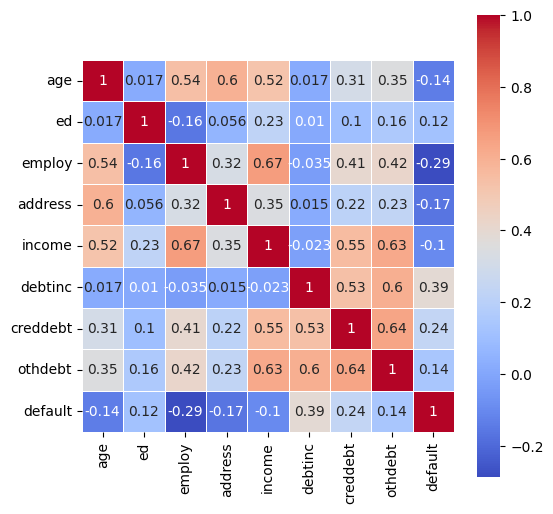

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(data_existing.corr(),
            cmap="coolwarm",
            annot=True,
            square=True,
            linewidths=0.5,
            linecolor='white')
plt.grid(False)
plt.show()

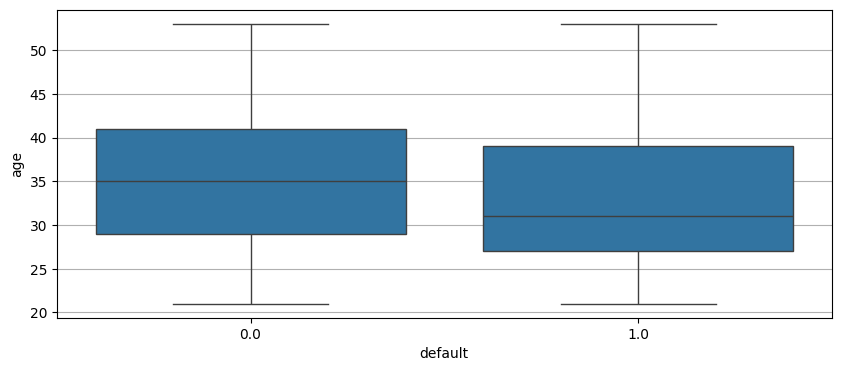

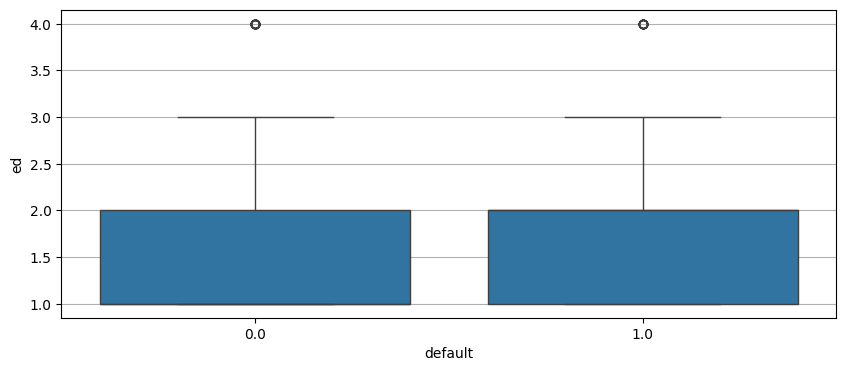

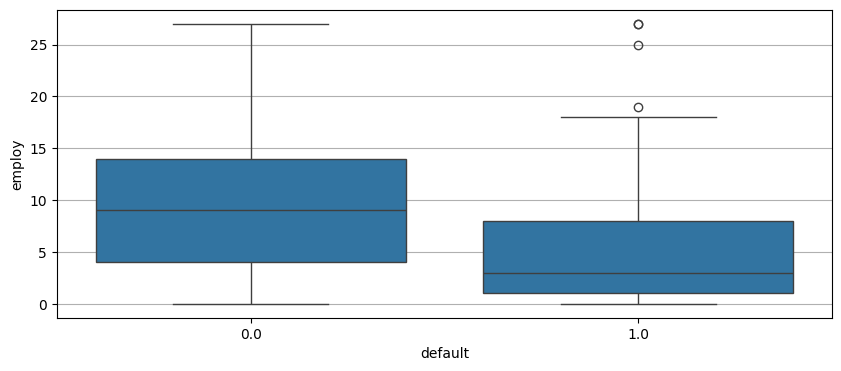

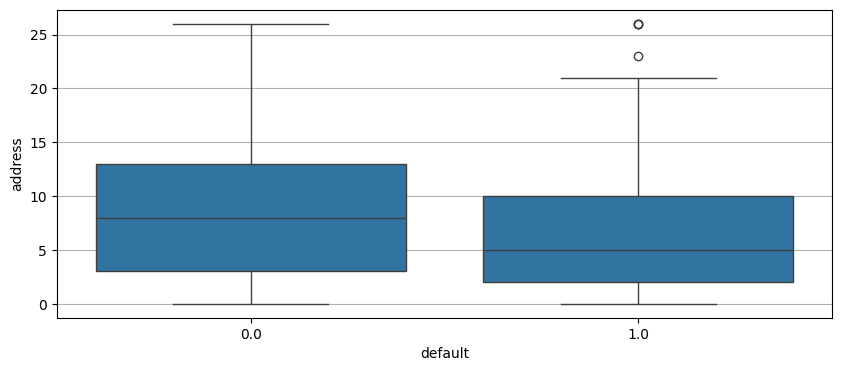

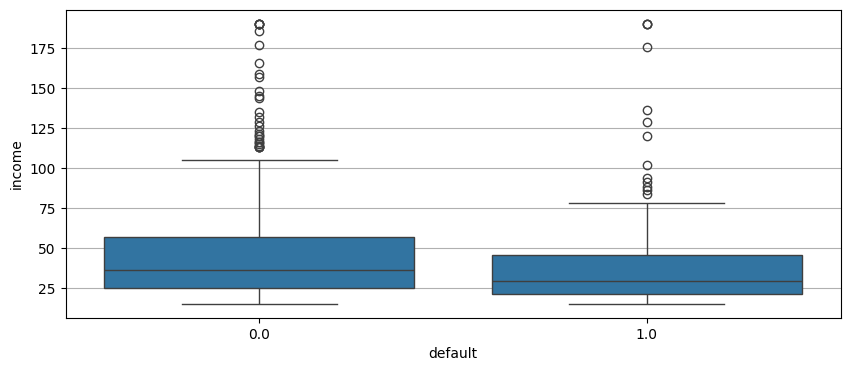

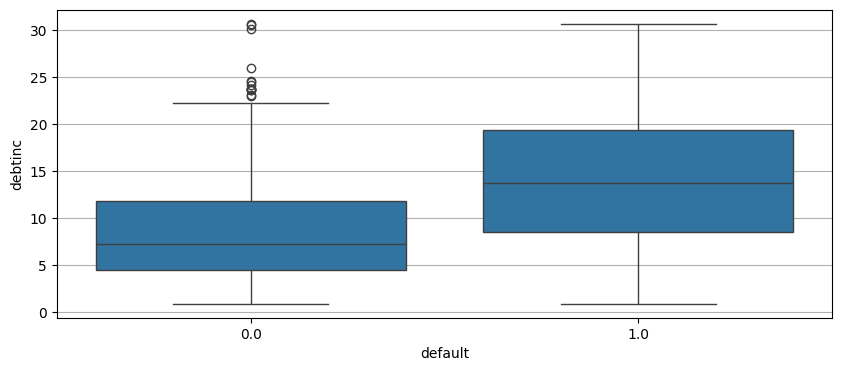

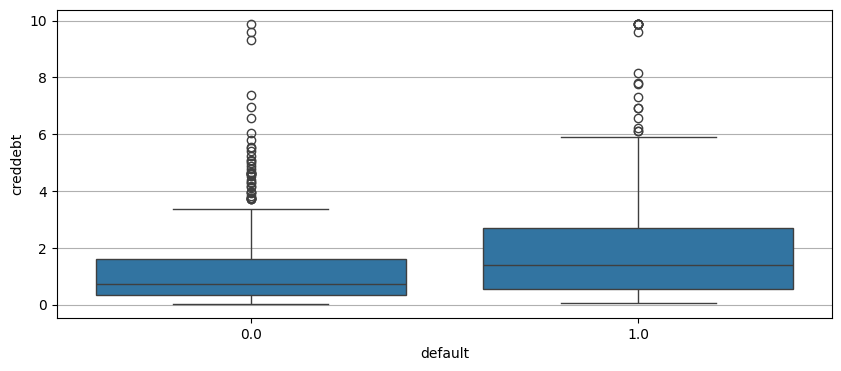

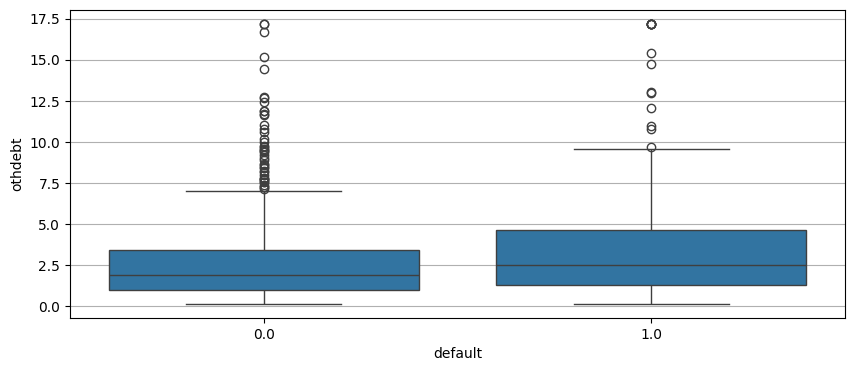

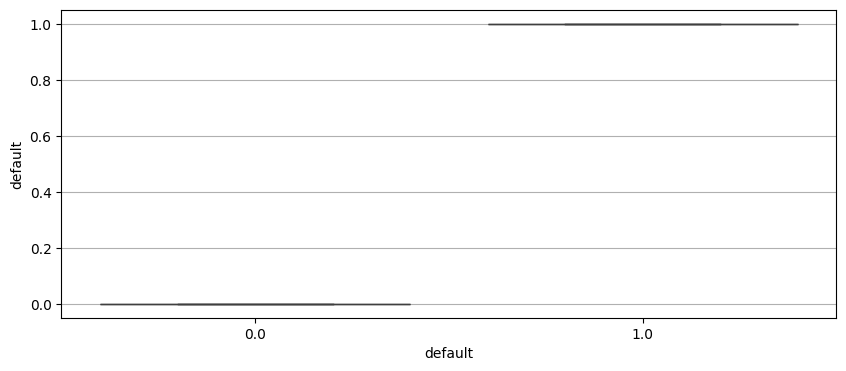

In [14]:
bp = PdfPages('BoxPlots with default Split.pdf')

for var in data_existing.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='default', y=var, data = data_existing)
    bp.savefig(fig)
bp.close()

## Statistical Analysis

Bivariate Analysis - Numeric(TTest) and Categorical(Chisquare)
Below ttest is performed to check the relationship between the independent samples in respect to the dependent variables. This helps us to identify if the variable is biased towards any given segment of the dependent variables.

Our H0 Hypothesis is that the independent samples of num_variable is not biased / related to the dependent variable i.e. default. However if Pvalue is higher then the variables are independent and are not significant for the model. We may exclue some of them based on pvalue and some other statistics that we will calculate below

In [15]:
tstats_df = pd.DataFrame()
for var in data_existing.columns.difference(['default']):
    tstats=stats.ttest_ind(data_existing[data_existing.default==1][var],
                           data_existing[data_existing.default==0][var])
    
    temp = pd.DataFrame([var, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
print(tstats_df)

  Variable Name T-Statistic   P-Value
0       address   -4.430552  0.000011
1           age   -3.698933  0.000234
2      creddebt    6.479087       0.0
3       debtinc   11.140936       0.0
4            ed    3.153507  0.001682
5        employ   -7.921358       0.0
6        income   -2.643292  0.008395
7       othdebt    3.707297  0.000226


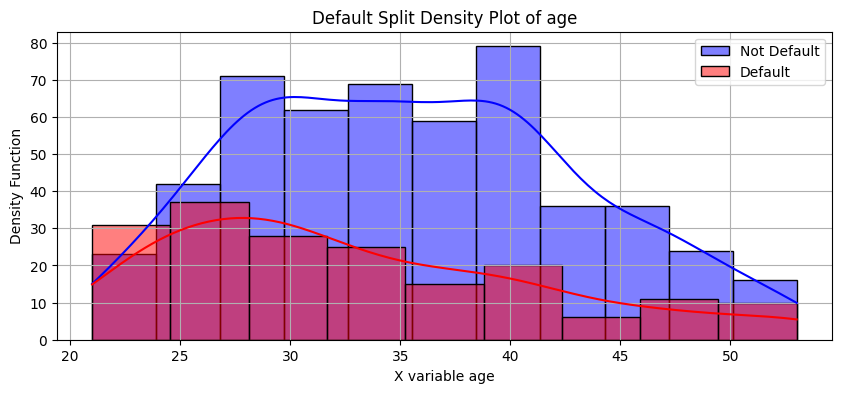

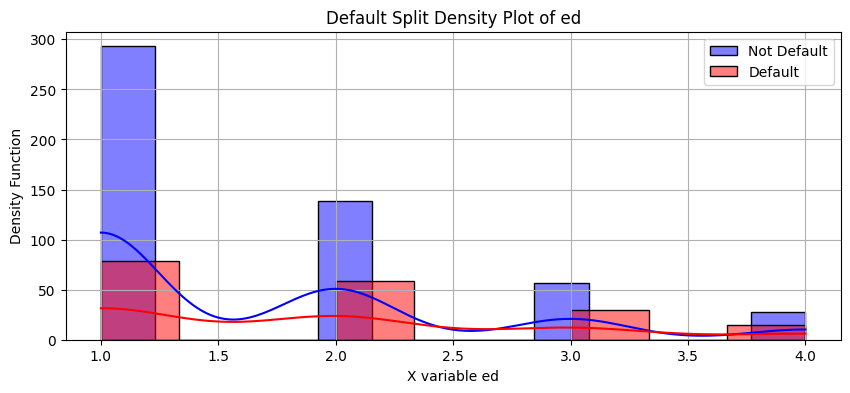

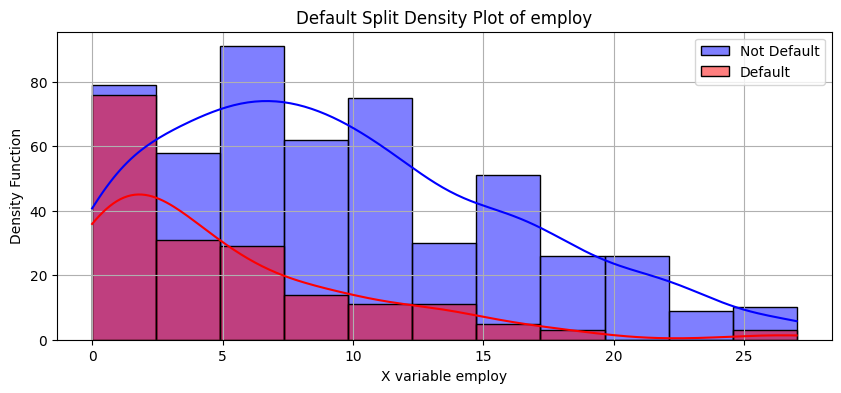

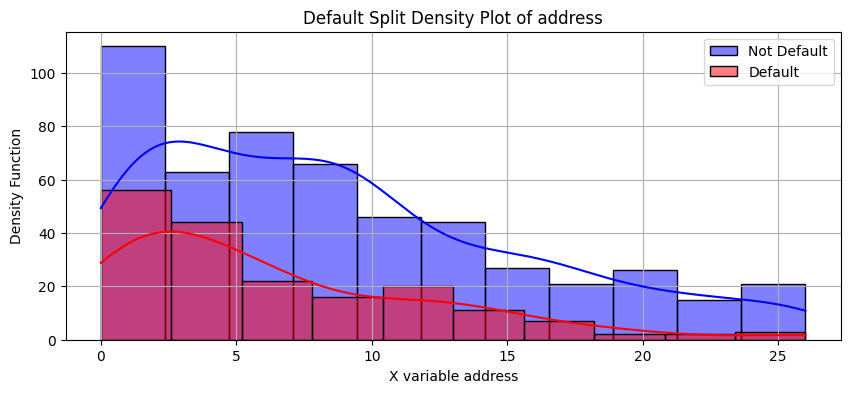

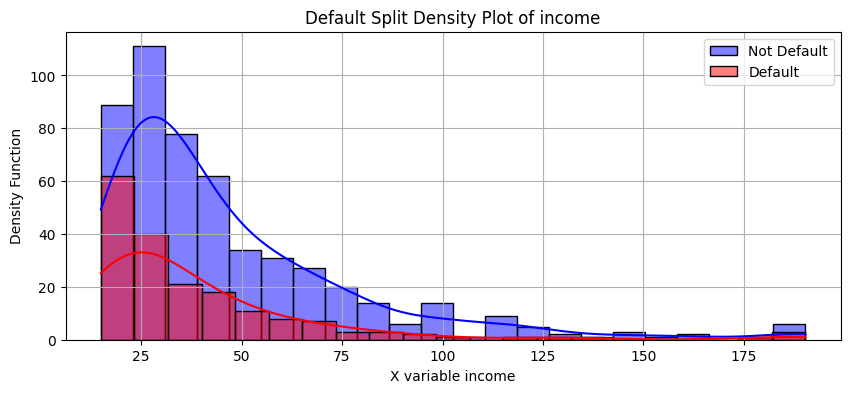

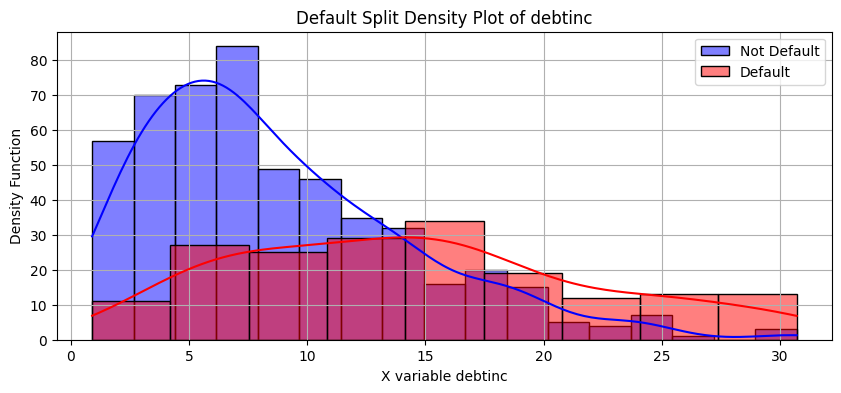

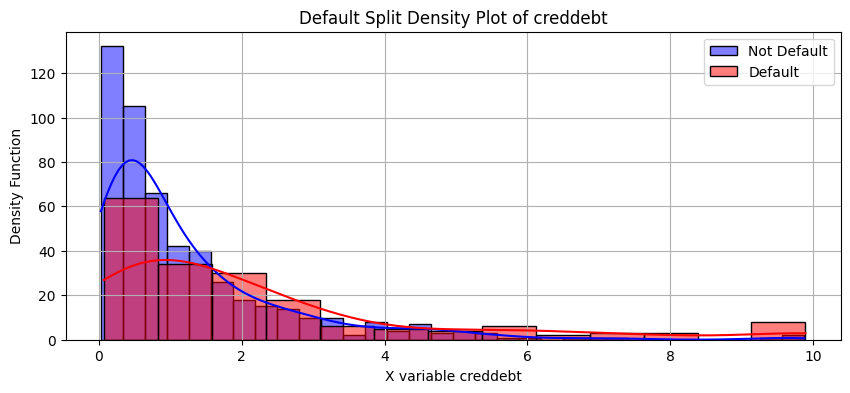

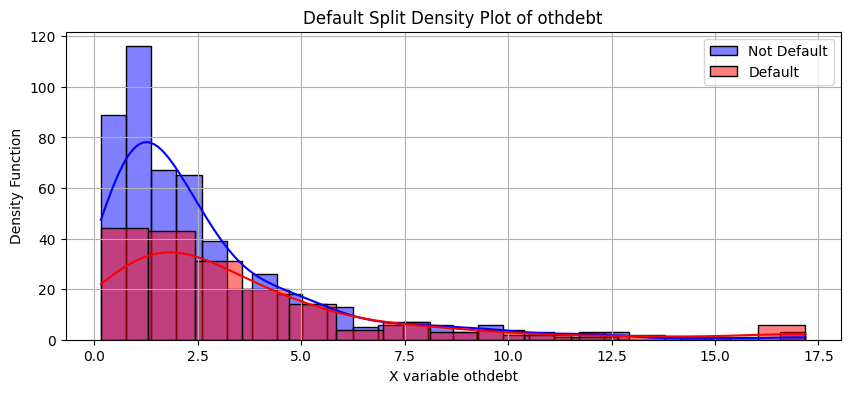

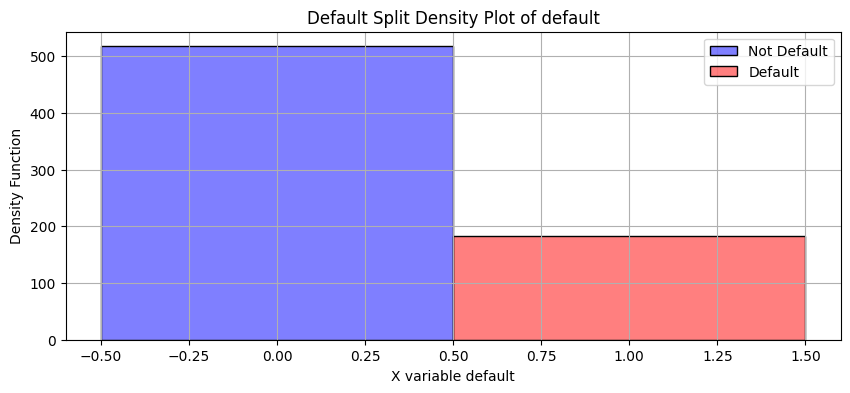

In [16]:
for var in data_existing.columns:
    fig,axes = plt.subplots(figsize=(10,4))
    #sns.distplot(hrdf[num_variable], kde=False, color='g', hist=True)
    
    sns.histplot(data_existing[data_existing['default']==0][var], label='Not Default', color='b',kde=True)
    sns.histplot(data_existing[data_existing['default']==1][var], label='Default', color='r',kde=True)
    plt.xlabel(str("X variable ") + str(var) )
    plt.ylabel('Density Function')
    plt.title(str('Default Split Density Plot of ')+str(var))
    plt.legend()

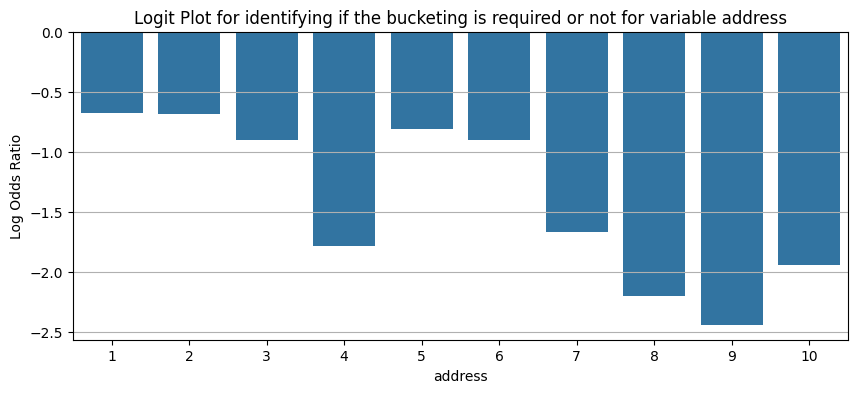

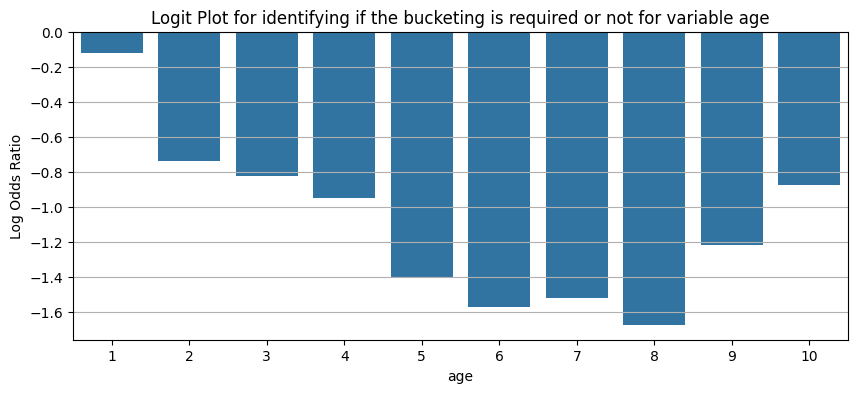

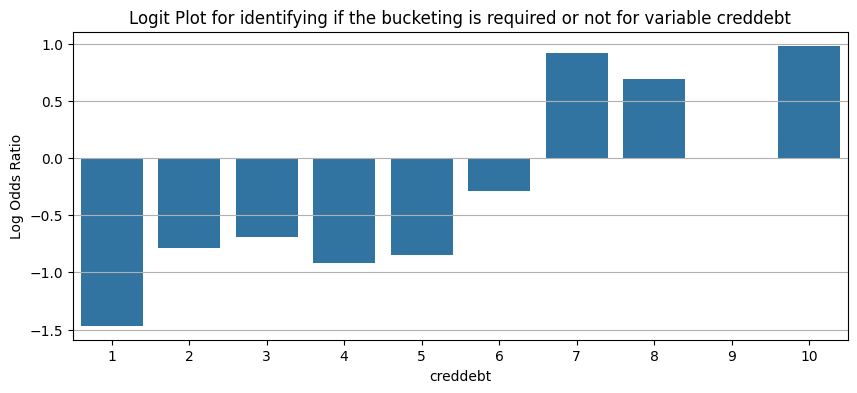

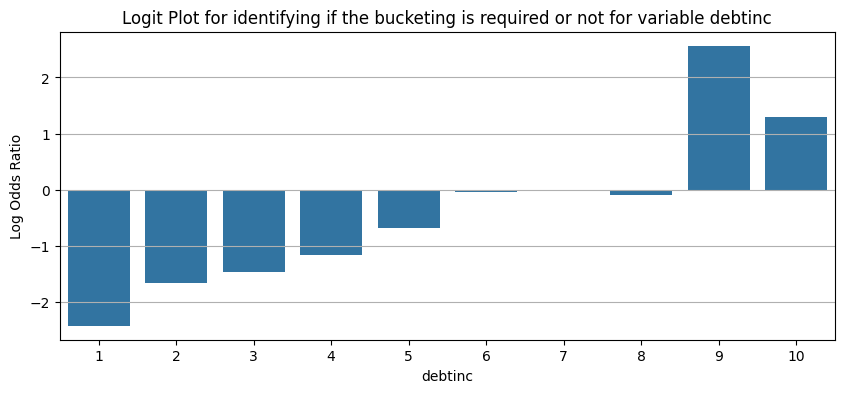

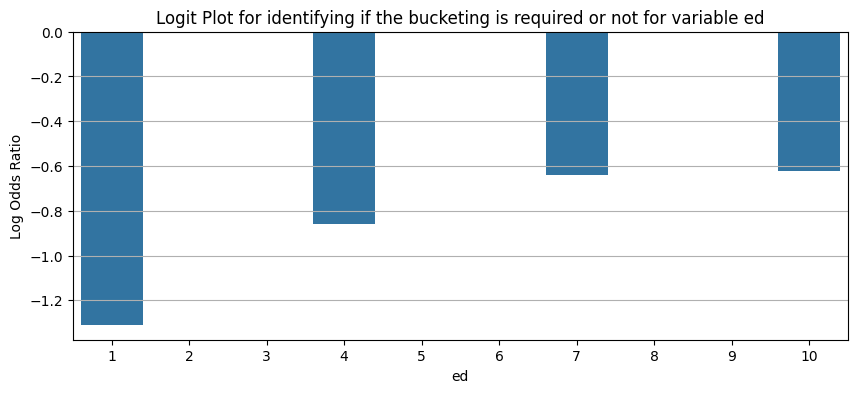

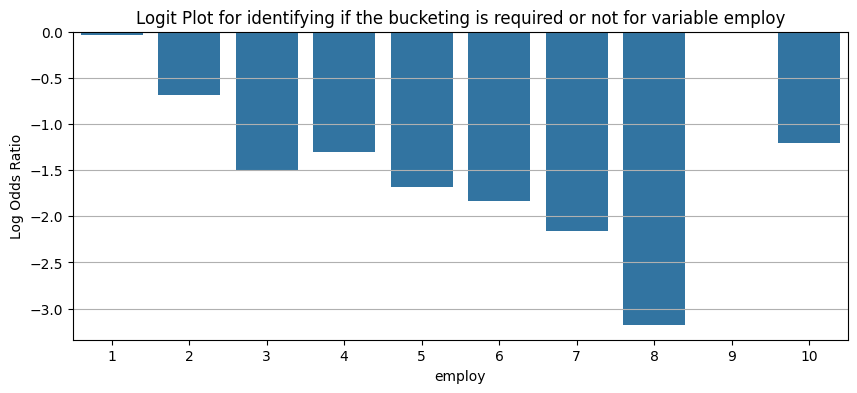

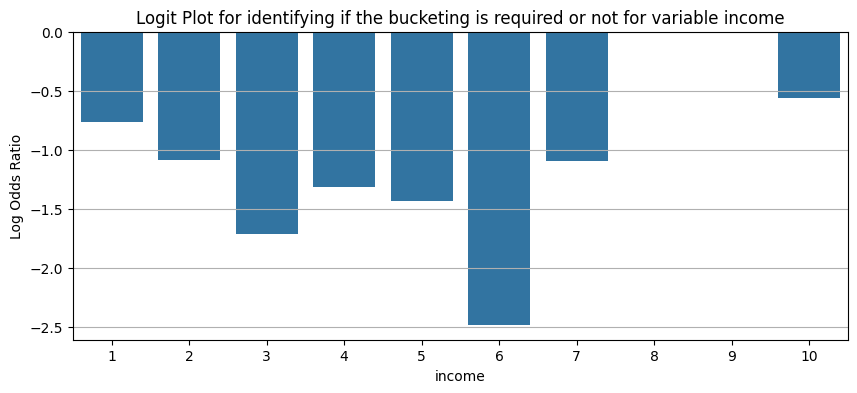

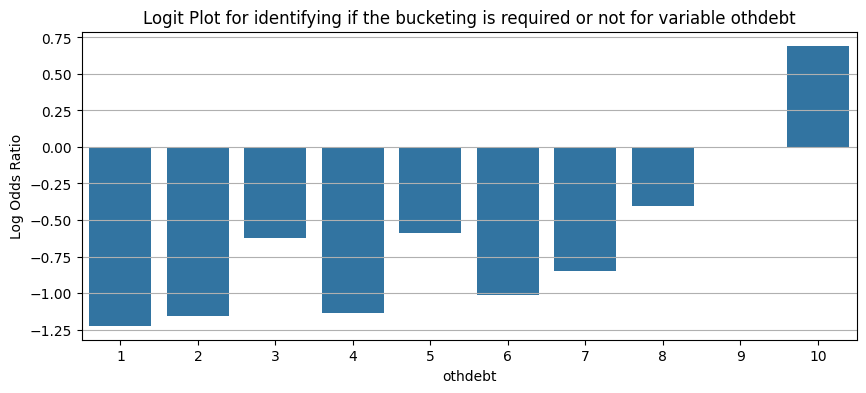

In [23]:
bp = PdfPages('Transformation Plots.pdf')

for var in data_existing.columns.difference(['default']):
    binned = pd.cut(data_existing[var], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = data_existing.groupby(binned)['default'].sum() / (data_existing.groupby(binned)['default'].count() - data_existing.groupby(binned)['default'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(var))
    bp.savefig(fig)

bp.close()

In [24]:
data_existing[['creddebt', 'othdebt', 'debtinc', 'employ','income' ]].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
creddebt,700.0,1.498843,1.788451,0.030209,0.170020,0.301390,0.440418,0.593059,0.854869,1.183471,1.615023,2.288026,3.621504,9.891428
othdebt,700.0,3.027290,3.115401,0.160936,0.562232,0.900747,1.165766,1.546101,1.987567,2.511054,3.258777,4.577926,7.036180,17.184744
debtinc,700.0,10.222153,6.682160,0.900000,2.900000,4.500000,5.800000,7.000000,8.600000,10.500000,12.900000,15.440000,19.610000,30.701000
employ,700.0,8.358671,6.566008,0.000000,1.000000,2.000000,4.000000,5.600000,7.000000,9.000000,11.000000,14.000000,18.000000,27.010000
income,700.0,44.848714,31.942133,15.000000,19.000000,22.000000,26.000000,29.000000,34.000000,40.400000,49.000000,61.000000,82.000000,190.300000


In [40]:
features = "+".join(data_existing.columns.difference(['default']))
a,b = dmatrices(formula_like='default ~ '+ features, data = data_existing, return_type='dataframe')
b = b.drop(columns=['Intercept'])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif['P value'] = tstats_df['P-Value']

print(vif)

   VIF Factor  features   P value
0    3.590208   address  0.000011
1   18.350045       age  0.000234
2    4.210691  creddebt       0.0
3   10.314745   debtinc       0.0
4    5.200182        ed  0.001682
5    6.282964    employ       0.0
6   14.830221    income  0.008395
7    7.793125   othdebt  0.000226


In [41]:
train_features = data_existing.columns.difference(['default'])
train_X, test_X = train_test_split(data_existing, test_size=0.3, random_state=42)
train_X.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

### Implementing Logistic Regression via Statistical Model

In [43]:
logreg = smf.logit(formula='default ~ ' + "+".join(train_features), data=train_X)
result = logreg.fit()
summ = result.summary()
summ

Optimization terminated successfully.
         Current function value: 0.425391
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  490
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Feb 2026   Pseudo R-squ.:                  0.2749
Time:                        16:35:39   Log-Likelihood:                -208.44
converged:                       True   LL-Null:                       -287.47
Covariance Type:            nonrobust   LLR p-value:                 4.065e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3844      0.736     -1.881      0.060      -2.827       0.058
address       -0.0853      0.026     -3.306      0.001      -0.136      -0.035
age            0.0389      0.020      1.924      0.054      -0.001       0.078
creddebt       0.6410      0.139      4.628      0.000       0.370       0.912
debtinc        0.0353      0.039      0.907      0.365      -0.041       0.112
ed             0.0080      0.142      0.056      0.955      -0.271       0.287
employ        -0.2650      0.040     -6.641      0.000      -0.343      -0.187
income        -0.0089      0.012     -0.721      0.471      -0.033       0.015
othdebt        0.1249      0.102      1.226      0.220      -0.075       0.325
==============================================================================
"""

In [44]:
AUC = metrics.roc_auc_score(train_X['default'], result.predict(train_X))

print('AUC is -> ' + str(AUC))

AUC is -> 0.8408309575716921


In [45]:
train_gini = 2*metrics.roc_auc_score(train_X['default'], result.predict(train_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_X['default'], result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.6816619151433843
The Gini Index for the model built on the Test Data is :  0.7665103308404106


In [46]:
train_predicted_prob = pd.DataFrame(result.predict(train_X))
train_predicted_prob.columns = ['prob']
train_actual = train_X['default']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']

test_predicted_prob = pd.DataFrame(result.predict(test_X))
test_predicted_prob.columns = ['prob']
test_actual = test_X['default']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']

## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
def cut_off_calculation(result,train_X,train_predict):
    
    roc_like_df = pd.DataFrame()
    train_temp = train_predict.copy()

    for cut_off in np.linspace(0,1,50):
        train_temp['cut_off'] = cut_off
        train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
        train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
        train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
        train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
        train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
        sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
        specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
        roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
        roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
        roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)
    return roc_like_df

roc_like_df = cut_off_calculation(result,train_X,train_predict)


In [47]:
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.22449,0.880597,0.660112,1.540709


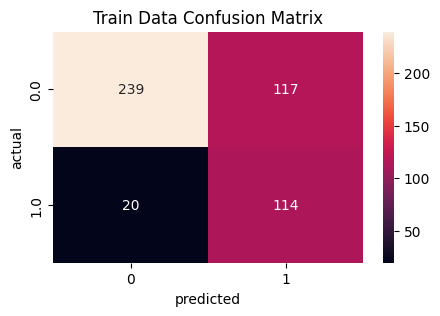

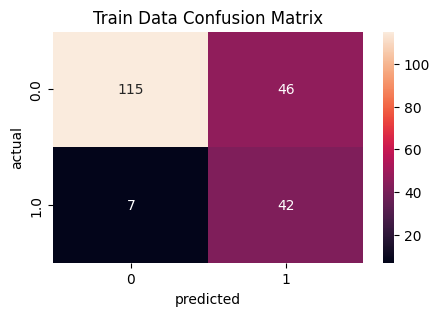

In [52]:
plt.figure(figsize=(5,3))
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.grid(False)
plt.show()

plt.figure(figsize=(5,3))
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.24 else 0)
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.grid(False)
plt.show()

In [53]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.7204081632653061
The overall accuracy score for the Test Data  is :  0.7476190476190476


## Decile Analysis

In [54]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
train_predict.head()

,actual,prob,predicted,Deciles
357,1.0,0.573708,1,8
649,0.0,0.500030,1,8
291,0.0,0.060040,0,2
420,1.0,0.574824,1,8
177,0.0,0.132731,0,3


In [55]:
df = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)

In [56]:
df.head()

,Deciles,actual
Deciles,,
9,441,36.0
8,392,28.0
7,343,26.0
6,294,15.0
5,245,13.0


In [58]:
train_features = data_existing.columns.difference(['default'])
train_sk_X,test_sk_X, train_sk_Y ,test_sk_Y = train_test_split(data_existing[train_features],data_existing['default'], test_size=0.3, random_state=42)
train_sk_X.columns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

## Logistic Regression

In [59]:
logisticRegr = LogisticRegression()
logisticRegr.fit(train_sk_X, train_sk_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
#Predicting the test cases
train_pred = pd.DataFrame({'actual':train_sk_Y,'predicted':logisticRegr.predict(train_sk_X)})
train_pred = train_pred.reset_index()
train_pred.drop(labels='index',axis=1,inplace=True)

In [61]:
train_gini = 2*metrics.roc_auc_score(train_sk_Y, logisticRegr.predict(train_sk_X)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test_sk_Y, result.predict(test_sk_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.3830706020459498
The Gini Index for the model built on the Test Data is :  0.7665103308404106


In [62]:
predict_proba_df = pd.DataFrame(logisticRegr.predict_proba(train_sk_X))
hr_test_pred = pd.concat([train_pred,predict_proba_df],axis=1)
hr_test_pred.columns=['actual','predicted','Left_0','Left_1']

In [63]:
auc_score = metrics.roc_auc_score( hr_test_pred.actual, hr_test_pred.Left_1  )
round( float( auc_score ), 2 )

0.84

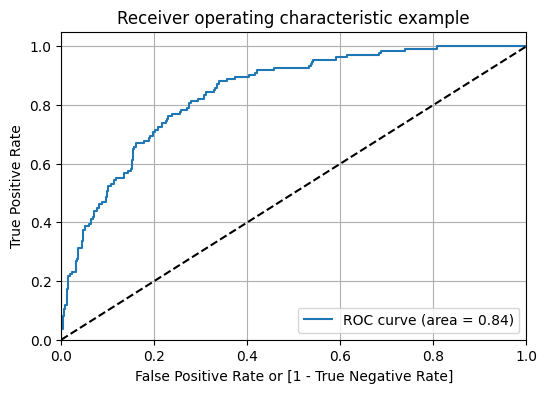

In [64]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve(hr_test_pred.actual,hr_test_pred.Left_1,drop_intermediate=False )
plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [66]:
cutoff_prob = thresholds[(np.abs(tpr - 0.72)).argmin()]
cutoff_prob

np.float64(0.3724867935435876)

In [67]:
hr_test_pred['new_labels'] = hr_test_pred['Left_1'].map( lambda x: 1 if x >= 0.36 else 0 )
print("The overall accuracy score for the Train Data is : ", round(metrics.accuracy_score(train_sk_Y, logisticRegr.predict(train_sk_X)),2))
print("The overall accuracy score for the Test Data is : ", round(metrics.accuracy_score(test_sk_Y, logisticRegr.predict(test_sk_X)),2))

The overall accuracy score for the Train Data is :  0.79
The overall accuracy score for the Test Data is :  0.86


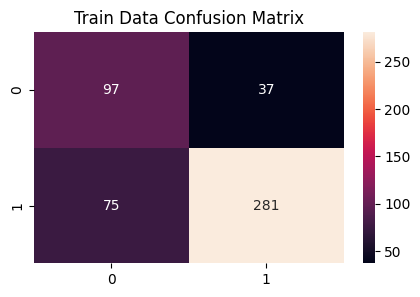

In [71]:
# Creating a confusion matrix

from sklearn import metrics

cm_train = metrics.confusion_matrix(
    hr_test_pred['actual'],
    hr_test_pred['new_labels'],
    labels=[1, 0]
)

plt.figure(figsize=(5,3))
sns.heatmap(cm_train,annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.grid(False)
plt.show()